<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Полезные-ссылки:" data-toc-modified-id="Полезные-ссылки:-0.0.1"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span><font color="orange">Полезные ссылки:</font></a></span></li></ul></li><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li></ul></li><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Тест" data-toc-modified-id="Тест-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тест</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Введение

По предоставленному набору данных о заказа такси в аэропорт требуется разработать модель для предсказания количества заказов на ближайший час. Требуемя метрика RMSE, величина которой не должна превышать 48. Процесс разработки модели разделим на следующие этапы:
- Обзор и подготовка данных
- Анализ данных
- Подбор моделей и гиперпараметров

## Подготовка

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('/datasets/taxi.csv', parse_dates=[0], index_col=[0])
data.sort_index(inplace=True)
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [4]:
data = data.resample('1H').sum()
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


## Анализ

<AxesSubplot:xlabel='datetime'>

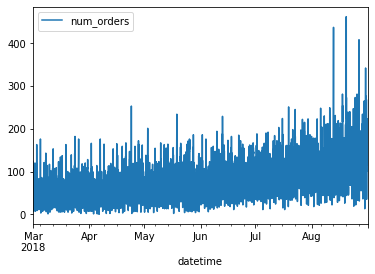

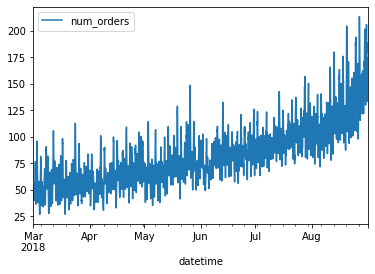

In [6]:
data.plot()
data.rolling(10).mean().plot()

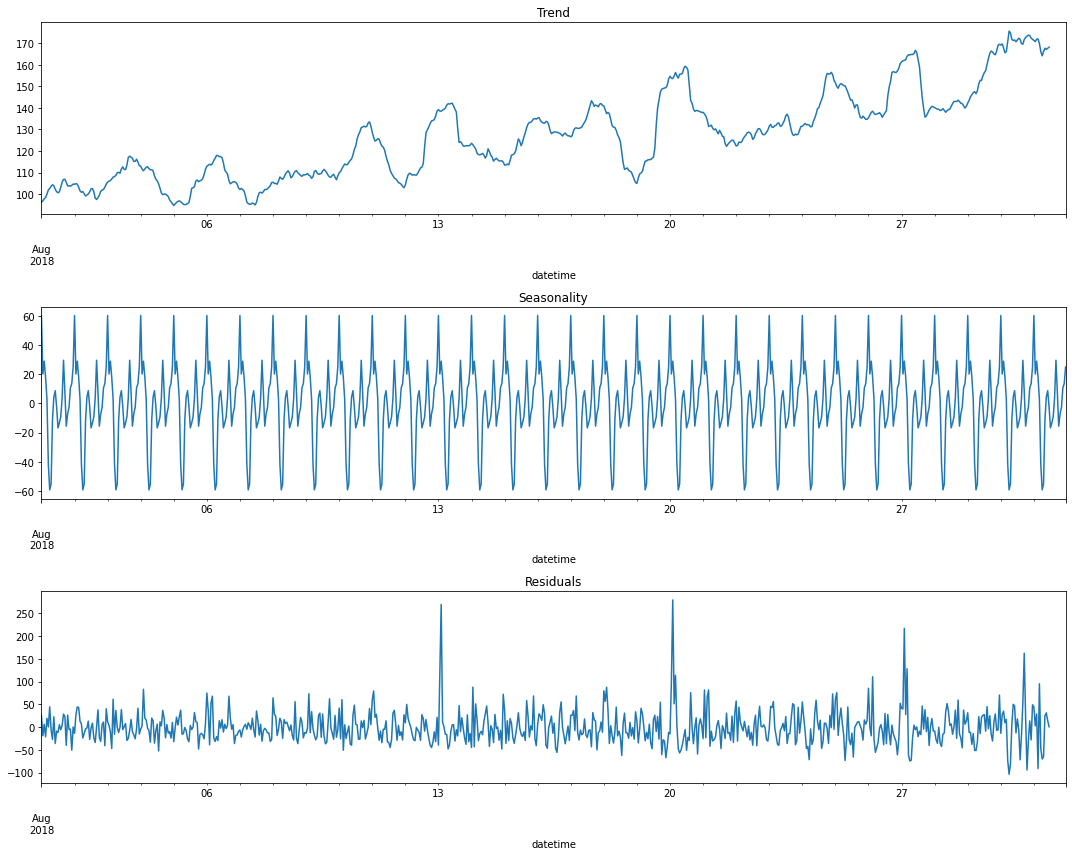

In [7]:
decomposed = seasonal_decompose(data['num_orders'])
plt.figure(figsize=(15, 12))

plt.subplot(311)
decomposed.trend['2018-08-01':'2018-08-31'].plot(ax=plt.gca())
plt.title('Trend')

plt.subplot(312)
decomposed.seasonal['2018-08-01':'2018-08-31'].plot(ax=plt.gca())
plt.title('Seasonality')

plt.subplot(313)
decomposed.resid['2018-08-01':'2018-08-31'].plot(ax=plt.gca())
plt.title('Residuals')

plt.tight_layout()

## Обучение

Разделим выборки на обучающую и тестовую

In [17]:
data_train, data_test = train_test_split(data, test_size=.1, shuffle=False)

В качестве признаков используем месяц, дату, день недели и час заказа такси.

In [9]:
def make_features(data, max_lag, rolling_mean_size):
    new_data = data.copy()
    new_data['month'] = new_data.index.month
    new_data['day'] = new_data.index.day
    new_data['dayofweek'] = new_data.index.dayofweek
    new_data['hour'] = new_data.index.hour
    
    for i in range(1, max_lag + 1):
        new_data['lag_' + str(i)] = new_data['num_orders'].shift(i)
    
    new_data['rolling_mean'] = new_data['num_orders'].shift(1).rolling(rolling_mean_size).mean()
    return new_data

Для подбора модели будем менять временной интервал используемых признаков, а так же размер окна скользящего среднего. Кроме того, в моделях, основанных на деревьях, будем менять гиперпараметры.

### Линейная регрессия

In [39]:
tc_cv = TimeSeriesSplit(n_splits=5, gap=0, max_train_size=3500, test_size=400)
scorer = make_scorer(mean_squared_error)

In [35]:
min_rmse = 48
best_model_lr = LinearRegression()
best_lag_lr = 0
best_roll_lr = 0
    
for lag in range(1, 25):
    for roll in range(1, 25):
        new_data = make_features(data_train, lag, roll)
        new_data = new_data.dropna()
        target = new_data['num_orders']
        features = new_data.drop('num_orders', axis=1)
        scores = cross_validate(LinearRegression(), features, target, cv=tc_cv, scoring=scorer, return_estimator=True)
        if (scores['test_score'].sum()/5)**.5 < min_rmse:
            min_rmse = (scores['test_score'].sum()/5)**.5
            print('min_rmse =', round(min_rmse, 2), 'lag =', lag, 'roll =', roll)
            best_model_lr = scores['estimator'][4]
            best_lag_lr = lag
            best_roll_lr = roll

min_rmse = 34.03535619029359 lag = 1 roll = 1
min_rmse = 34.004510993437734 lag = 1 roll = 4
min_rmse = 33.96774343195536 lag = 1 roll = 5
min_rmse = 33.93156778515963 lag = 1 roll = 6
min_rmse = 33.91794826291267 lag = 1 roll = 18
min_rmse = 33.86887422745077 lag = 1 roll = 19
min_rmse = 33.858374403419354 lag = 1 roll = 20
min_rmse = 33.84788651603207 lag = 1 roll = 21
min_rmse = 33.83323071517943 lag = 3 roll = 18
min_rmse = 33.78942759402215 lag = 3 roll = 19
min_rmse = 33.78809035142365 lag = 3 roll = 20
min_rmse = 33.775676453338626 lag = 3 roll = 21
min_rmse = 33.759752260692814 lag = 7 roll = 19
min_rmse = 33.73863700154955 lag = 7 roll = 20
min_rmse = 33.73200456541452 lag = 7 roll = 21
min_rmse = 33.6923423591698 lag = 9 roll = 12
min_rmse = 33.59499244504071 lag = 9 roll = 24
min_rmse = 33.52393890352581 lag = 11 roll = 15
min_rmse = 33.49581610781845 lag = 11 roll = 18
min_rmse = 33.39723457744903 lag = 11 roll = 19
min_rmse = 33.36832126754861 lag = 11 roll = 20
min_rmse =

### Дерево решений

In [41]:
min_rmse = 48
best_model_dt = DecisionTreeRegressor()
best_lag_dt = 0
best_roll_dt = 0
     
for lag in range(5, 19):
    for roll in range(5, 19):

        new_data = make_features(data_train, lag, roll)
        new_data = new_data.dropna()
        target = new_data['num_orders']
        features = new_data.drop('num_orders', axis=1)

        for depth in range(5, 20):
            model_dt = DecisionTreeRegressor(max_depth=depth)
            scores = cross_validate(model_dt, features, target, cv=tc_cv, scoring=scorer, return_estimator=True)
            if (scores['test_score'].sum()/5)**.5 < min_rmse:
                min_rmse = (scores['test_score'].sum()/5)**.5
                print('min_rmse =', round(min_rmse, 2), 'lag =', lag, 'roll =', roll, 'max_depth =', depth)
                best_model_dt = scores['estimator'][4]
                best_lag_dt = lag
                best_roll_dt = roll

min_rmse = 32.882958160906576 lag = 5 roll = 5 max_depth = 5
min_rmse = 31.309877814543672 lag = 5 roll = 5 max_depth = 6
min_rmse = 30.870743986193457 lag = 5 roll = 5 max_depth = 7
min_rmse = 30.18904697058727 lag = 5 roll = 6 max_depth = 7
min_rmse = 29.97219272161116 lag = 5 roll = 6 max_depth = 8
min_rmse = 29.783091002151455 lag = 5 roll = 8 max_depth = 7
min_rmse = 29.649978183075547 lag = 5 roll = 8 max_depth = 8


### Случайный лес

In [43]:
min_rmse = 48
best_model_rf = DecisionTreeRegressor()
best_lag_rf = 0
best_roll_rf = 0

for lag in range(12, 18):
    for roll in range(12, 18):
        
        new_data = make_features(data_train, lag, roll)
        new_data = new_data.dropna()
        target = new_data['num_orders']
        features = new_data.drop('num_orders', axis=1)
        
        for estimators in range(80, 141, 20):
            for depth in range(10, 15):
                model_rf = RandomForestRegressor(n_estimators=estimators, max_depth=depth)
                scores = cross_validate(model_rf, features, target, cv=tc_cv, scoring=scorer, return_estimator=True)
                if (scores['test_score'].sum()/5)**.5 < min_rmse:
                    min_rmse = (scores['test_score'].sum()/5)**.5
                    print('min_rmse =', round(min_rmse, 2), 'lag =', lag, 'roll =', roll, 'max_depth =', depth, 'n_estimators =', estimators)
                    best_model_rf = scores['estimator'][4]
                    best_lag_rf = lag
                    best_roll_rf = roll

min_rmse = 26.47 lag = 12 roll = 12 max_depth = 10 n_estimators = 80
min_rmse = 26.33 lag = 12 roll = 12 max_depth = 11 n_estimators = 80
min_rmse = 26.28 lag = 12 roll = 12 max_depth = 12 n_estimators = 80
min_rmse = 26.09 lag = 12 roll = 12 max_depth = 13 n_estimators = 80
min_rmse = 25.98 lag = 12 roll = 12 max_depth = 14 n_estimators = 140
min_rmse = 25.87 lag = 12 roll = 13 max_depth = 13 n_estimators = 120
min_rmse = 25.85 lag = 13 roll = 14 max_depth = 13 n_estimators = 100
min_rmse = 25.83 lag = 13 roll = 14 max_depth = 14 n_estimators = 140
min_rmse = 25.79 lag = 14 roll = 16 max_depth = 14 n_estimators = 120


## Тест

In [38]:
# Test LR
new_data_test = make_features(data_test, best_lag_lr, best_roll_lr)
new_data_test = new_data_test.dropna()
target_test = new_data_test['num_orders']
features_test = new_data_test.drop('num_orders', axis=1)
predict_test = best_model_lr.predict(features_test)
mean_squared_error(predict_test, target_test, squared=False)

46.451559811136256

In [42]:
# Test DT
new_data_test = make_features(data_test, best_lag_dt, best_roll_dt)
new_data_test = new_data_test.dropna()
target_test = new_data_test['num_orders']
features_test = new_data_test.drop('num_orders', axis=1)
predict_test = best_model_dt.predict(features_test)
mean_squared_error(predict_test, target_test, squared=False)

54.9620462544044

In [45]:
# Test RF
new_data_test = make_features(data_test, best_lag_rf, best_roll_rf)
new_data_test = new_data_test.dropna()
target_test = new_data_test['num_orders']
features_test = new_data_test.drop('num_orders', axis=1)
predict_test = best_model_rf.predict(features_test)
mean_squared_error(predict_test, target_test, squared=False)

49.66388235029398

## Выводы

Наименьшую ошибку показала модель Случайный лес с обучением на данных за предыдущие 14 часов, размером окна скользящего среднего 16 часов. А так же гиперпараметрами n_estimators = 100 и max_depth = 13.

## Чек-лист проверки